<a href="https://colab.research.google.com/github/lahfidhiba/The-Coding-School/blob/main/fraud_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

fraud_df = pd.read_csv("/content/sample_data/synthetic_fraud_dataset.csv")



!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


from sklearn.metrics import *

In [12]:
fraud_df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [13]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [14]:
fraud_df.columns = [col.replace ("_", " ") for col in fraud_df.columns]

In [15]:
fraud_df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Type,Timestamp,Account Balance,Device Type,Location,Merchant Category,IP Address Flag,...,Daily Transaction Count,Avg Transaction Amount 7d,Failed Transaction Count 7d,Card Type,Card Age,Transaction Distance,Authentication Method,Risk Score,Is Weekend,Fraud Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


For "Age," it's measured in weeks

In [16]:

fraud_df.describe()


,Transaction Amount,Account Balance,IP Address Flag,Previous Fraudulent Activity,Daily Transaction Count,Avg Transaction Amount 7d,Failed Transaction Count 7d,Card Age,Transaction Distance,Risk Score,Is Weekend,Fraud Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [17]:
fraud_df['Fraud Label'].value_counts()

,count
Fraud Label,
0,33933
1,16067


In [18]:
fraud_df['Risk Score'].value_counts()

,count
Risk Score,
0.6917,16
0.3606,15
0.2990,15
0.9781,14
0.2228,14
...,...
0.4741,1
0.5626,1
0.3965,1


In [19]:
numeric_columns = fraud_df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['Transaction Amount', 'Account Balance', 'IP Address Flag',
       'Previous Fraudulent Activity', 'Daily Transaction Count',
       'Avg Transaction Amount 7d', 'Failed Transaction Count 7d', 'Card Age',
       'Transaction Distance', 'Risk Score', 'Is Weekend', 'Fraud Label'],
      dtype='object')


Those with a failed transaction amount equal to or under 2 are less prone to their transaction being labeled a fraud --> this is graphed using the median of the data.

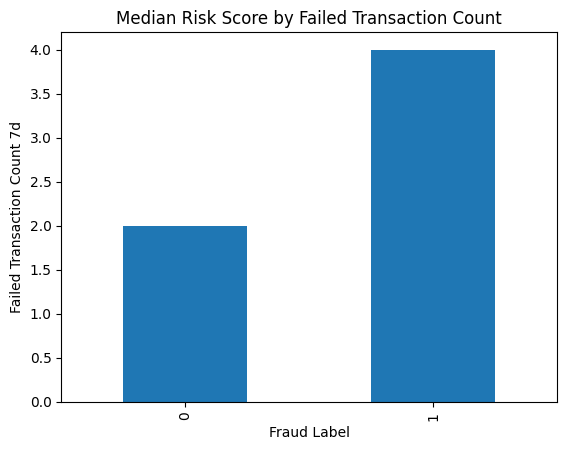

In [80]:
median_scores = fraud_df.groupby("Fraud Label")["Failed Transaction Count 7d"].median()
median_scores.plot(kind='bar')
plt.title("Median Risk Score by Failed Transaction Count")
plt.xlabel("Fraud Label")
plt.ylabel("Failed Transaction Count 7d")
plt.show()

By comparing both the mean and median graphs, I can conclude that if an account has a failed transaction count of 2 or less in 7 days, its transactions are not considered fraudulent. I can also conclude that those with fewer failed transactions are less prone to fraudulent transactions.

In [22]:
fraud_df['Fraud Label'].value_counts()

,count
Fraud Label,
0,33933
1,16067


Around 32% of transactions in the data set were fraudulent.

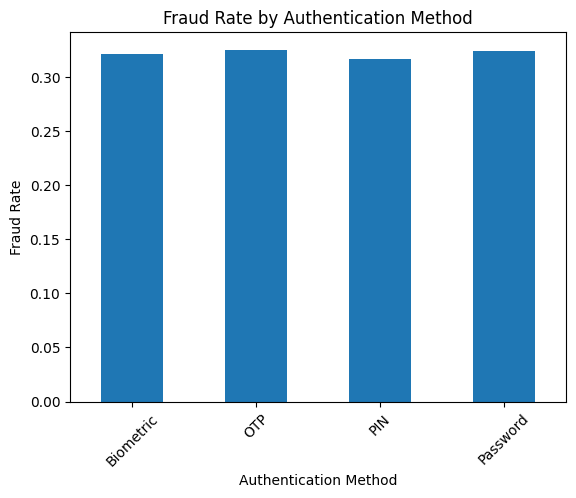

In [58]:
fraud_rate = fraud_df.groupby('Authentication Method')['Fraud Label'].mean()
fraud_rate.plot(kind='bar')
plt.xlabel('Authentication Method')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Authentication Method')
plt.xticks(rotation=45)
plt.show()

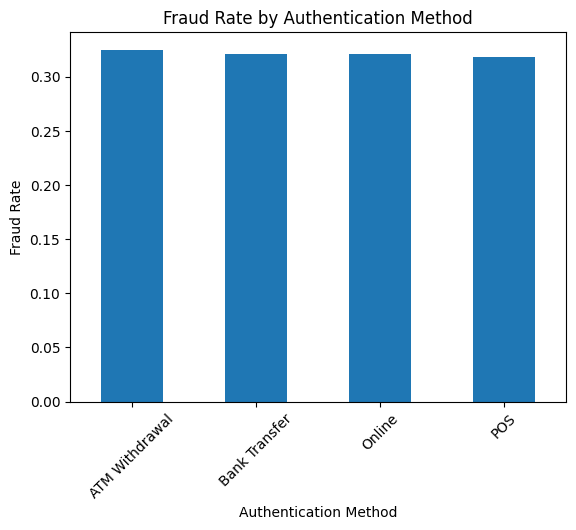

In [39]:
fraud_rate = fraud_df.groupby('Transaction Type')['Fraud Label'].mean()
fraud_rate.plot(kind='bar')
plt.xlabel('Authentication Method')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Authentication Method')
plt.xticks(rotation=45)
plt.show()

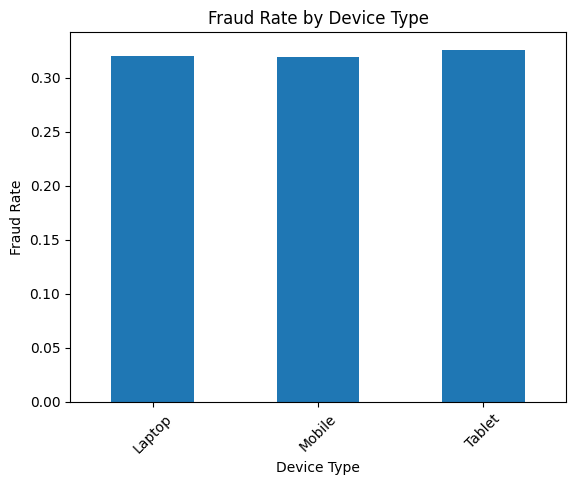

In [41]:
fraud_rate = fraud_df.groupby('Device Type')['Fraud Label'].mean()
fraud_rate.plot(kind='bar')
plt.xlabel('Device Type')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Device Type')
plt.xticks(rotation=45)
plt.show()

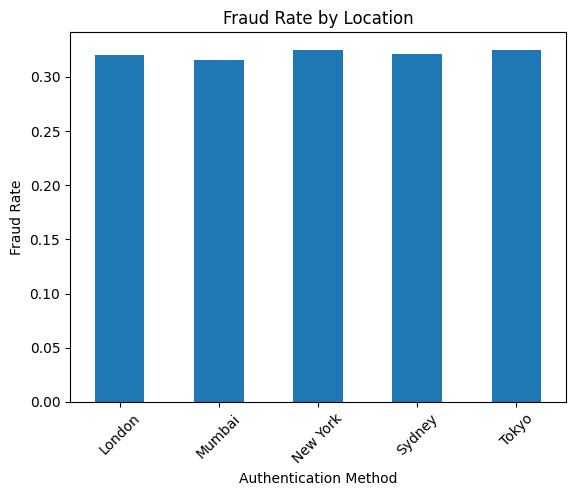

In [42]:
fraud_rate = fraud_df.groupby('Location')['Fraud Label'].mean()
fraud_rate.plot(kind='bar')
plt.xlabel('Authentication Method')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Location')
plt.xticks(rotation=45)
plt.show()

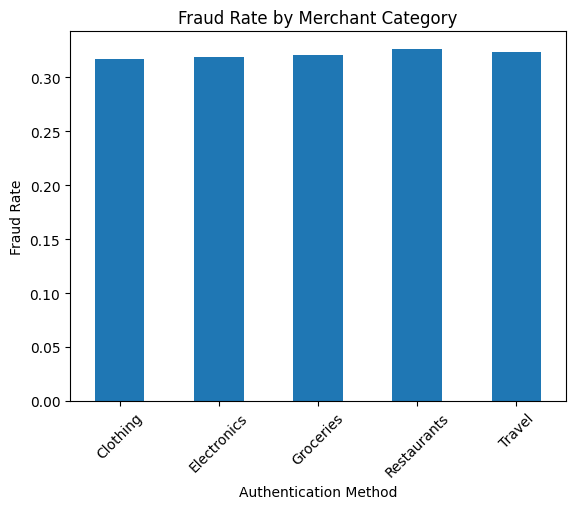

In [43]:
fraud_rate = fraud_df.groupby('Merchant Category')['Fraud Label'].mean()
fraud_rate.plot(kind='bar')
plt.xlabel('Authentication Method')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Merchant Category')
plt.xticks(rotation=45)
plt.show()

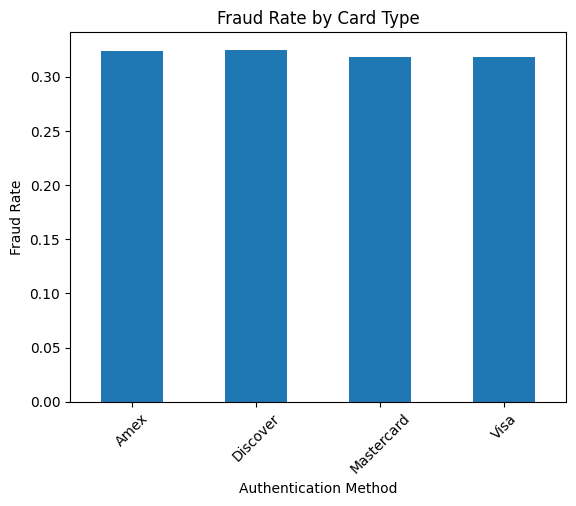

In [44]:
fraud_rate = fraud_df.groupby('Card Type')['Fraud Label'].mean()
fraud_rate.plot(kind='bar')
plt.xlabel('Authentication Method')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Card Type')
plt.xticks(rotation=45)
plt.show()

Now that I have plotted a bar graph, it confirms that there is not really a correlation --> The least correlation.

In [37]:
columns_to_drop = ['Transaction ID', 'User ID', 'Session ID', 'Timestamp']
fraud_df = fraud_df.drop(columns=columns_to_drop, errors='ignore')

By doing this, I filterted out irrelevant variables.

In [61]:
fraud_df.head()

,Transaction Amount,Transaction Type,Account Balance,Device Type,Location,Merchant Category,IP Address Flag,Previous Fraudulent Activity,Daily Transaction Count,Avg Transaction Amount 7d,Failed Transaction Count 7d,Card Type,Card Age,Transaction Distance,Authentication Method,Risk Score,Is Weekend,Fraud Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


**QUESTIONS**
1. Are higher transactions more prone to being labeled as fraud?
2. Does risk score play a big role in determining whether a transaction is fraud? --> look more into transaction value, how is the spending pattern of this given person changing over time...
3. Relationship between risk score and fraud label.


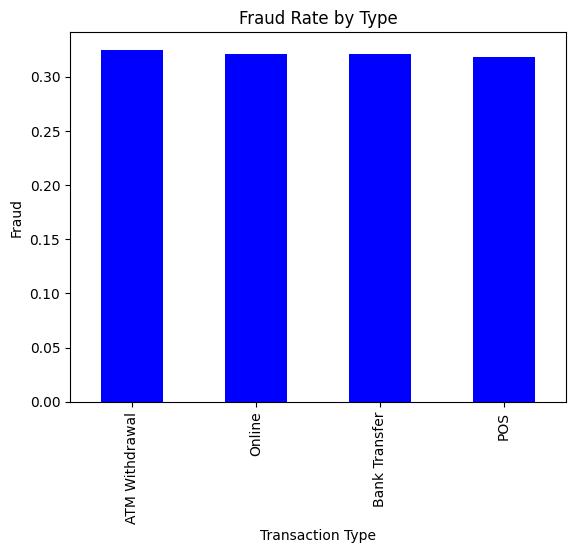

In [62]:
fraud= fraud_df.groupby("Transaction Type")["Fraud Label"].mean().sort_values(ascending=False)
fraud.plot(kind="bar", title="Fraud Rate by Type", color ="blue")
plt.ylabel("Fraud")
plt.show()

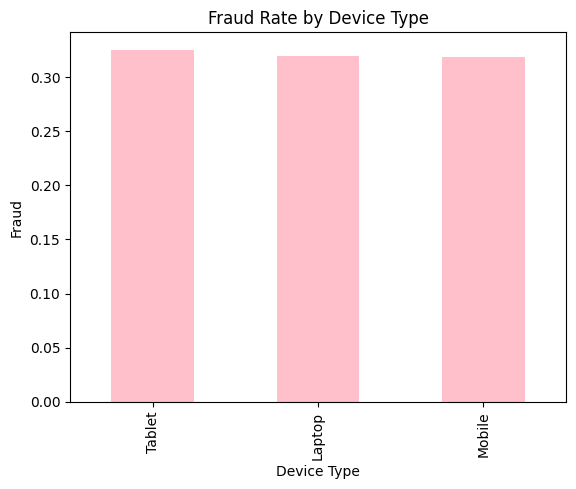

In [65]:
fraud= fraud_df.groupby("Device Type")["Fraud Label"].mean().sort_values(ascending=False)
fraud.plot(kind="bar", title="Fraud Rate by Device Type", color ="pink")
plt.ylabel("Fraud")
plt.show()

In [66]:
numeric_df=fraud_df.select_dtypes(include=["number"])



In [67]:
correlation= numeric_df.corr()

In [68]:
correlation_with_target = correlation["Fraud Label"].abs().sort_values(ascending=False)
print(correlation_with_target)

Fraud Label                     1.000000
Failed Transaction Count 7d     0.509871
Risk Score                      0.385810
Daily Transaction Count         0.007065
Account Balance                 0.003153
Card Age                        0.003120
IP Address Flag                 0.003028
Transaction Amount              0.001901
Previous Fraudulent Activity    0.000718
Avg Transaction Amount 7d       0.000703
Transaction Distance            0.000116
Is Weekend                      0.000064
Name: Fraud Label, dtype: float64


MOST CORRELATED IS FAILED TRANSACTION COUNT 7D

In [69]:
X = fraud_df['Failed Transaction Count 7d']
y = fraud_df["Fraud Label"]

In [70]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=50000,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

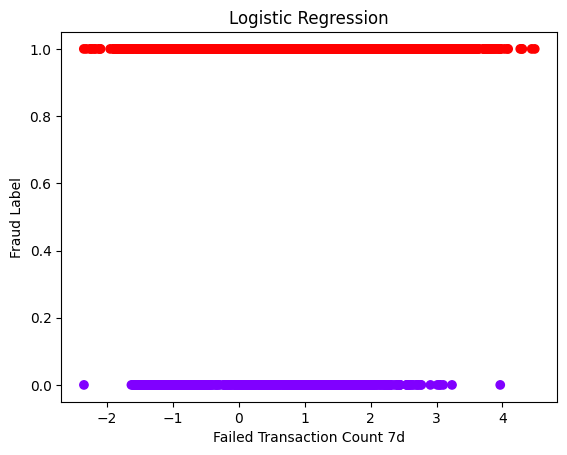

In [71]:
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Logistic Regression')
plt.xlabel("Failed Transaction Count 7d")
plt.ylabel('Fraud Label')
plt.show()

In [72]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9562
Precision: 0.9840
Recall: 0.9271
F1-score: 0.9547


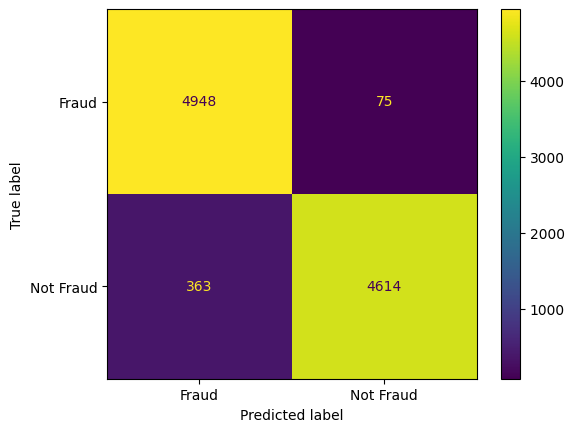

In [78]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ["Fraud","Not Fraud"])
plt.show()